## 决策树
##### 决策树学习基本算法
```python
def TreeGenerate(D, A):
    生成节点node
    if D中样本全属于同一类别C:
        将node标记为C类叶节点
        return
    if A == ∅ or D中样本在A上取值相同:
        将node标记为叶节点，其类别标记为D中样本数最多的类
        return
    从A中选择最优划分属性a*
    for a*_v in a*:
        为node生成个分支
        令D_v表示D中在a*上取值为a*_v的样本子集
        if D_v == ∅:
            将分支节点标记为叶节点，其类别标记为D中样本最多的类
            return
        else:
            以TreeGenerate(D_v, 已经去掉a*的A)为分支节点
```
输入：  
训练集 D = {(x<sup>(1)</sup>, y<sup>(1)</sup>), (x<sup>(2)</sup>, y<sup>(2)</sup>), ……, (x<sup>(m)</sup>, y<sup>(m)</sup>)}  
属性集 A = {a<sup>(1)</sup>, a<sup>(2)</sup>, ……,a<sup>(d)</sup>}  
输出：  
以node为根节点的一颗决策树

##### 信息熵公式
$$Ent\left(D\right)=-\sum_{i=1}^{m}{P^{\left(i\right)}\log_2{P^{\left(i\right)}}}$$
##### 信息增益公式
$$Gain\left(D,a\right)=Ent(D)-\sum_{v=1}^{V}{\frac{\left|D^{\left(v\right)}\right|}{\left|D\right|}Ent(D^{\left(v\right)})}$$



In [1]:
# 导入库
import csv
from math import log2
from collections import Counter

# 决策树绘制使用，需要安装graphviz，并将bin目录添加到环境变量
# 下载地址：https://www.graphviz.org/download/
# 我安装的版本：graphviz-10.0.1 (64-bit) ZIP archive
# 同时也需要pip安装包：pip install graphviz
import graphviz

In [2]:
# 加载西瓜2.0数据集
def load_dataset():
    A = None
    D = []
    with open('dataset_西瓜2.0.csv', encoding='utf8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            rv = tuple(row.values())
            D.append((rv[1:len(rv)-1], rv[len(rv)-1]))
        A = tuple(row.keys())
        A = list(A[1:len(A)-1]) # 去掉编号和结果
    return A, D
A, D = load_dataset()
A_dict = {}
for i in range(len(A)):
    A_dict[A[i]] = i
# 特征X名
print(A)
# 特征X名对应D特征X值的位置
print(A_dict)
# D是一个tuple，索引0是所特征值X值的tuple，所以1是结果Y
for i in range(len(D)):
    print(f'编号{i+1}:{D[i]}')
    

['色泽', '根蒂', '敲声', '纹理', '脐部', '触感']
{'色泽': 0, '根蒂': 1, '敲声': 2, '纹理': 3, '脐部': 4, '触感': 5}
编号1:(('青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'), '是')
编号2:(('乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑'), '是')
编号3:(('乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'), '是')
编号4:(('青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑'), '是')
编号5:(('浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'), '是')
编号6:(('青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘'), '是')
编号7:(('乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘'), '是')
编号8:(('乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑'), '是')
编号9:(('乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑'), '否')
编号10:(('青绿', '硬挺', '清脆', '清晰', '平坦', '软粘'), '否')
编号11:(('浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑'), '否')
编号12:(('浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘'), '否')
编号13:(('青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑'), '否')
编号14:(('浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑'), '否')
编号15:(('乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘'), '否')
编号16:(('浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑'), '否')
编号17:(('青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑'), '否')


In [3]:
'''
获取字典中值最大的键值对
'''
def kv_max_value(dic):
    max_k, max_v = list(dic.keys())[0], list(dic.values())[0]
    
    for k, v in dic.items():
        if v > max_v:
            max_v, max_k = k, v
    return max_k, max_v

'''
求信息熵
'''
def ent(D):
    y_list = list(map(lambda x: x[1], D))
    dic = Counter(y_list)
    r = 0
    for y in dic.keys():
        p = dic[y] / len(y_list)
        r += - p * log2(p)
    return r

'''
求信息增益
'''
def gain(D, a):
    a_idx = A_dict[a]
    av_ds = list(map(lambda x: x[0][a_idx], D))
    dic = Counter(av_ds)
    r = ent(D)
    for av in dic.keys():
        r -= dic[av] / len(av_ds) * ent(list(filter(lambda x: x[0][a_idx]==av, D)))
    return r

'''
求最大信息增益
'''
def max_gain(D, A):
    r = 0
    max_a = None
    for a in A:
        c = gain(D, a)
        if c > r:
            r = c
            max_a = a
    return max_a

'''
求样本集合D中属性a的可能取值
'''
def a_v(D, a):
    a_idx = A_dict[a]
    av_set = set(map(lambda x: x[0][a_idx], D))
    return av_set

'''
判断D中特征X的取值是否都一致
'''
def unique_X(D, A):
    unique = True
    for d in D[1:]:
        for a in A:
            if d[0][A_dict[a]] != D[0][0][A_dict[a]]:
                unique = False
                break
        if not unique:
            break
    return unique

'''
获取所有特征X的可能取值
'''
def A_v(D, A):
    X_v_dict = {}
    for a in A:
        X_v_dict[a] = a_v(D, a)
    return X_v_dict

# 绘制决策树图
def draw_tree_graphviz(node, d):
    if node.leaf:
        if node.a == "是":
            t = "好瓜"
        else:
            t = "坏瓜"
        d.node(f'n{node.id}', t)
    else:
        d.node(f'n{node.id}', f'{node.a}=?', shape='box')
    if node.parent is not None:
        d.edge(f'n{node.parent.id}', f'n{node.id}', label=node.av)
    if not node.leaf:
        for child in node.children:
            draw_tree_graphviz(child, d)      

class Node:
    def __init__(self, id=None, parent=None, a=None, av = None, leaf=False):
        self.id = id                        # 主要是为了graphviz会用的，确保节点的名字唯一
        self.parent = parent                # 当前节点的父节点
        if parent is not None:
            parent.children.append(self)
        self.a = a                          # 当前节点的值（叶节点是Y结果的取值，非叶节点是特征X）
        self.av = av                        # 当前节点来自的X属性的特征值
        self.leaf = leaf                    # 当前节点是否为叶节点                          
        self.children = []                  # 当前节点的全部子节点，叶节点是空列表

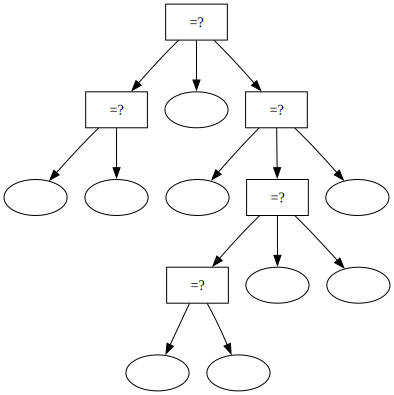

In [4]:
# 递归实现
X_v_dict = A_v(D, A)
id = 0        
def create_tree(D_cur, A_cur, parent, from_parent_av):
    global id
    # 获取结果Y的计数
    y_list = list(map(lambda x: x[1], D_cur))
    dic = Counter(y_list)
    
    # 结果Y都一致
    if len(list(dic.keys())) == 1:
        node = Node(id=id, parent=parent, a=list(dic.keys())[0], av=from_parent_av, leaf=True)
        id += 1
        return node
    
    # 特征X都取完了 or 所有特征X的值都相同
    if not A_cur or unique_X(D_cur, A_cur):
        node = Node(id=id, parent=parent, a=kv_max_value(dic)[0], av=from_parent_av, leaf=True)
        id += 1
        return node
    
    max_a = max_gain(D_cur, A_cur)
    node = Node(id=id, parent=parent, a=max_a, av=from_parent_av)
    id += 1
    # 下面循环得到的特征取值一定要是原始数据集的全部
    for av in X_v_dict[max_a]:
        # 令D_v表示D中在a*上取值为a*_v的样本子集
        D_v = list(filter(lambda x: x[0][A_dict[max_a]]==av, D_cur))
        if len(D_v) == 0:
            # 将分支节点标记为叶节点，其类别标记为D中样本最多的类
            Node(id=id, parent=node, a=kv_max_value(dic)[0], av=av, leaf=True)
            id += 1
            # return # 这里不能return的，比如av有3个，到第2个return了，第3个就不会处理了
        else:
            A_cp = A_cur.copy()
            A_cp.remove(max_a)
            create_tree(D_v, A_cp, node, av)
            
    return node

r = create_tree(D, A, None, None)
# jupyter notebook能直接显示
d = graphviz.Digraph()        
draw_tree_graphviz(r, d)
d
# 备注：画出来的图和西瓜书不同，我觉得是西瓜书的图错了，谁有空帮忙验证一下。

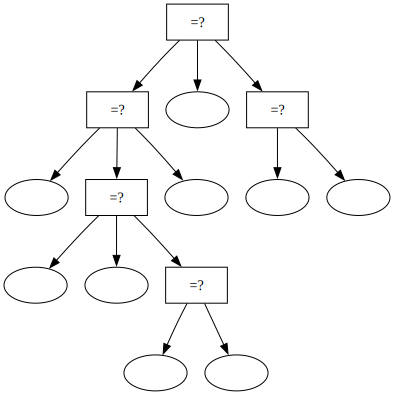

In [5]:
# 堆栈实现
X_v_dict = A_v(D, A)
id = 0
def create_tree(D_cur, A_cur, parent, from_parent_av):
    global id
    stack = [] 
    stack.append([D_cur, A_cur, parent, from_parent_av])
    root = None
    while len(stack) > 0:
        D_cur, A_cur, parent, from_parent_av = stack.pop()
        # 获取结果Y的计数
        y_list = list(map(lambda x: x[1], D_cur))
        dic = Counter(y_list)
        
        # 结果Y都一致
        if len(list(dic.keys())) == 1:
            node = Node(id=id, parent=parent, a=list(dic.keys())[0], av=from_parent_av, leaf=True)
            id += 1
            if root is None:
                root = node
            continue
        
        # 特征X都取完了 or 所有特征X的值都相同
        if not A_cur or unique_X(D_cur, A_cur):
            node = Node(id=id, parent=parent, a=kv_max_value(dic)[0], av=from_parent_av, leaf=True)
            id += 1
            if root is None:
                root = node
            continue
        
        max_a = max_gain(D_cur, A_cur)
        node = Node(id=id, parent=parent, a=max_a, av=from_parent_av)
        id += 1
        if root is None:
            root = node
        # 下面循环得到的特征取值一定要是原始数据集的全部
        for av in X_v_dict[max_a]:
            # 令D_v表示D中在a*上取值为a*_v的样本子集
            D_v = list(filter(lambda x: x[0][A_dict[max_a]]==av, D_cur))
            if len(D_v) == 0:
                # 将分支节点标记为叶节点，其类别标记为D中样本最多的类
                Node(id=id, parent=node, a=kv_max_value(dic)[0], av=av, leaf=True)
                id += 1
                # return # 这里不能return的，比如av有3个，到第2个return了，第3个就不会处理了
            else:
                A_cp = A_cur.copy()
                A_cp.remove(max_a)
                stack.append([D_v, A_cp, node, av])
            
    return root

r = create_tree(D, A, None, None)
# jupyter notebook能直接显示
d = graphviz.Digraph()        
draw_tree_graphviz(r, d)
d
# 备注：画出来的图和西瓜书不同，我觉得是西瓜书的图错了，谁有空帮忙验证一下。

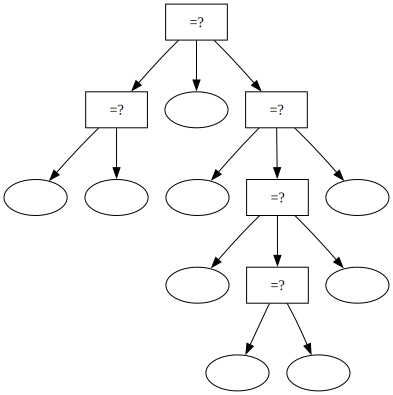

In [6]:
# 队列实现 FIFO
X_v_dict = A_v(D, A)
id = 0
def create_tree(D_cur, A_cur, parent, from_parent_av):
    global id
    queue = [] 
    queue.append([D_cur, A_cur, parent, from_parent_av])
    root = None
    while len(queue) > 0:
        D_cur, A_cur, parent, from_parent_av = queue[0]     # 取FI
        del queue[0]    # FO
        # 获取结果Y的计数
        y_list = list(map(lambda x: x[1], D_cur))
        dic = Counter(y_list)
        
        # 结果Y都一致
        if len(list(dic.keys())) == 1:
            node = Node(id=id, parent=parent, a=list(dic.keys())[0], av=from_parent_av, leaf=True)
            id += 1
            if root is None:
                root = node
            continue
        
        # 特征X都取完了 or 所有特征X的值都相同
        if not A_cur or unique_X(D_cur, A_cur):
            node = Node(id=id, parent=parent, a=kv_max_value(dic)[0], av=from_parent_av, leaf=True)
            id += 1
            if root is None:
                root = node
            continue
        
        max_a = max_gain(D_cur, A_cur)
        node = Node(id=id, parent=parent, a=max_a, av=from_parent_av)
        id += 1
        if root is None:
            root = node
        # 下面循环得到的特征取值一定要是原始数据集的全部
        for av in X_v_dict[max_a]:
            # 令D_v表示D中在a*上取值为a*_v的样本子集
            D_v = list(filter(lambda x: x[0][A_dict[max_a]]==av, D_cur))
            if len(D_v) == 0:
                # 将分支节点标记为叶节点，其类别标记为D中样本最多的类
                Node(id=id, parent=node, a=kv_max_value(dic)[0], av=av, leaf=True)
                id += 1
                # return # 这里不能return的，比如av有3个，到第2个return了，第3个就不会处理了
            else:
                A_cp = A_cur.copy()
                A_cp.remove(max_a)
                queue.append([D_v, A_cp, node, av])
            
    return root

r = create_tree(D, A, None, None)
# jupyter notebook能直接显示
d = graphviz.Digraph()        
draw_tree_graphviz(r, d)
d
# 备注：画出来的图和西瓜书不同，我觉得是西瓜书的图错了，谁有空帮忙验证一下。

In [7]:
# 预测函数
def predict(X, node):
    result = None
    def walk_tree(X, node):
        nonlocal result
        if node.leaf:
            p = node.parent
            if X[p.a] == node.av:
                if node.a == "是":
                    result = "好瓜"
                else:
                    result = "坏瓜"
        else:
            if node.a in X.keys():
                for child in node.children:
                    if child.av == X[node.a ]:
                        walk_tree(X, child)
    walk_tree(X, node)
    return result

for item in D:
    X = A_dict.copy()
    for k, v in A_dict.items():
        X[k] = item[0][v]
    if item[1] == "是":
        result = "好瓜"
    else:
        result = "坏瓜"
    assert result == predict(X, r), '预测与原始数据集不符合！'
    
print(predict({'色泽': '浅白', '根蒂': '稍蜷', '敲声': '浊响', '纹理': '清晰', '脐部': '凹陷', '触感': '硬滑'}, r))

好瓜
